# Analiza oglasov za delo

V tej nalogi analiziram oglase za študenska dela objevljene na: studentski-servis.com

In [163]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import random

In [164]:
dela = pd.read_csv("podatki.csv\podatki.csv", index_col = "št_oglasa")

In [165]:
dela

,delo,lokacija,plača_neto[€/h],plača_bruto[€/h],opis,prosta_mesta,trajanje,delovnik,začetek_dela
št_oglasa,,,,,,,,,
435925,DELO V LOGISTIKI,ŠENTJUR,7.06,8.2,"Potrebujejo osebo za deklariranje, delo v logi...",1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,1. 9. 2024
435924,INŠTALACIJE,ŠTAJERSKA REGIJA,8.0,9.3,Iščejo polnoletni osebi za inštalacijska dela:...,2,PO DOGOVORU,DOPOLDAN,26. 8. 2024
435923,FINANČNE STORITVE,LJUBLJANA,9.0,10.46,Za naročnika iščejo dinamične in samoiniciativ...,5,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,28. 8. 2024
435922,ADMINISTRATIVNA DELA,LJUBLJANA,7.31,8.5,Iščejo študenta/ko za študentsko delo na oddel...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,2. 9. 2024
435921,KONTROLA KAKOVOSTI,ŠKOFJA LOKA,6.45,7.5,Iščejo študenta/ko oz. absolventa/ko za pomoč ...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,2. 9. 2024
...,...,...,...,...,...,...,...,...,...
434348,GRADBENA DELA,LJUBLJANA IN OKOLICA,8.61,10.0,V stabilnem podjetju z daljšo tradicijo in mla...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,po dogovoru
434344,INFLUENCER,MARIBOR/OD DOMA,9.0,10.46,V spletni trgovini z modnimi denarnicami iščej...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,po dogovoru
434342,POUČEVANJE,LJUBLJANA,8.0,9.3,Iščejo več polnoletnih oseb za izvajanje strok...,30,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,16. 9. 2024


Preverimo katera dela v svojem opisu omenjajo izkušnje. V tabelo dodajmo stolpec z vrednostima True, kadar opis omenja izkušnje in False kadar jih ne.

In [166]:
dela['izkušnje'] = dela['opis'].str.contains(r'izkušnje', case=False)

In [167]:
dela

,delo,lokacija,plača_neto[€/h],plača_bruto[€/h],opis,prosta_mesta,trajanje,delovnik,začetek_dela,izkušnje
št_oglasa,,,,,,,,,,
435925,DELO V LOGISTIKI,ŠENTJUR,7.06,8.2,"Potrebujejo osebo za deklariranje, delo v logi...",1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,1. 9. 2024,False
435924,INŠTALACIJE,ŠTAJERSKA REGIJA,8.0,9.3,Iščejo polnoletni osebi za inštalacijska dela:...,2,PO DOGOVORU,DOPOLDAN,26. 8. 2024,True
435923,FINANČNE STORITVE,LJUBLJANA,9.0,10.46,Za naročnika iščejo dinamične in samoiniciativ...,5,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,28. 8. 2024,False
435922,ADMINISTRATIVNA DELA,LJUBLJANA,7.31,8.5,Iščejo študenta/ko za študentsko delo na oddel...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,2. 9. 2024,False
435921,KONTROLA KAKOVOSTI,ŠKOFJA LOKA,6.45,7.5,Iščejo študenta/ko oz. absolventa/ko za pomoč ...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,2. 9. 2024,False
...,...,...,...,...,...,...,...,...,...,...
434348,GRADBENA DELA,LJUBLJANA IN OKOLICA,8.61,10.0,V stabilnem podjetju z daljšo tradicijo in mla...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,po dogovoru,False
434344,INFLUENCER,MARIBOR/OD DOMA,9.0,10.46,V spletni trgovini z modnimi denarnicami iščej...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,po dogovoru,True
434342,POUČEVANJE,LJUBLJANA,8.0,9.3,Iščejo več polnoletnih oseb za izvajanje strok...,30,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,16. 9. 2024,False


Preštejmo, koliko oglasov omenja izkušnje in koliko jih ne.
Predpostavljam, da imajo dela, ki v opisu omenjajo izkušnje v povprečju višjo urno postavko, preverjam ali to drži. Še prej pretvorim vrednosti stolpcev s plačami v številske.

In [168]:
dela.groupby("izkušnje").size()

izkušnje
False    736
True     264
dtype: int64

In [169]:
dela["plača_neto[€/h]"] = pd.to_numeric(dela["plača_neto[€/h]"], errors='coerce')


In [170]:
povprečna_plača_izkušnje = dela.groupby("izkušnje")["plača_neto[€/h]"].mean()
print(f"povprečna plača del, ki v opisu:\n - omenjajo izkušnje je {round(povprečna_plača_izkušnje[True], 1)}\n - ne omenjajo izkušenj je {round(povprečna_plača_izkušnje[False], 1)}")

povprečna plača del, ki v opisu:
 - omenjajo izkušnje je 8.0
 - ne omenjajo izkušenj je 7.7


Predpostavka drži. Zdaj si oglejmo lokacije del. Najperej preverimo kje je največ razpisanih del.

In [171]:
dela_po_lokacijah = dela.groupby("lokacija").size().sort_values(ascending= False)

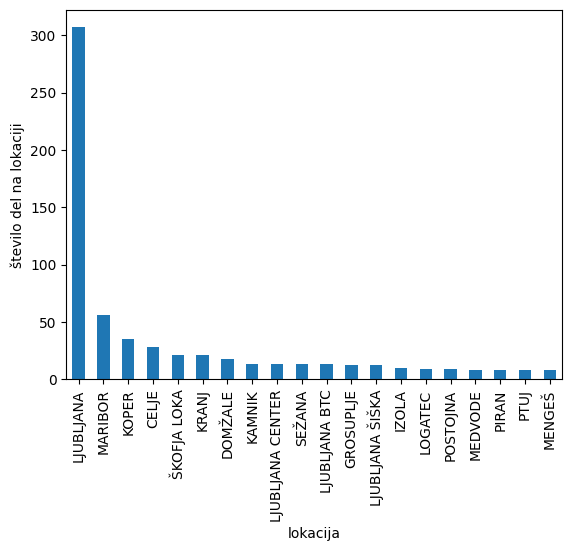

In [172]:
prikaz_dela_po_lokacijah = dela_po_lokacijah.head(20).plot.bar()
prikaz_dela_po_lokacijah.set_ylabel("število del na lokaciji")
plt.show()

Po pričakovanjih je daleč največ del razpisanih v največjem mestu, Ljubljani. Zdaj si oglejmo na kateri lokaciji so v povprečju dela najbolje plačana. \(Pri analizi plač glede na lokacijo bom izpustila lokacije z dvema oglasoma ali manj.\)

In [173]:
štetje_lokacij = dela["lokacija"].value_counts()
naj_pogoste_lokacije = štetje_lokacij[štetje_lokacij > 3].index
dela_pogoste_lokacije = dela[dela["lokacija"].isin(naj_pogoste_lokacije)]

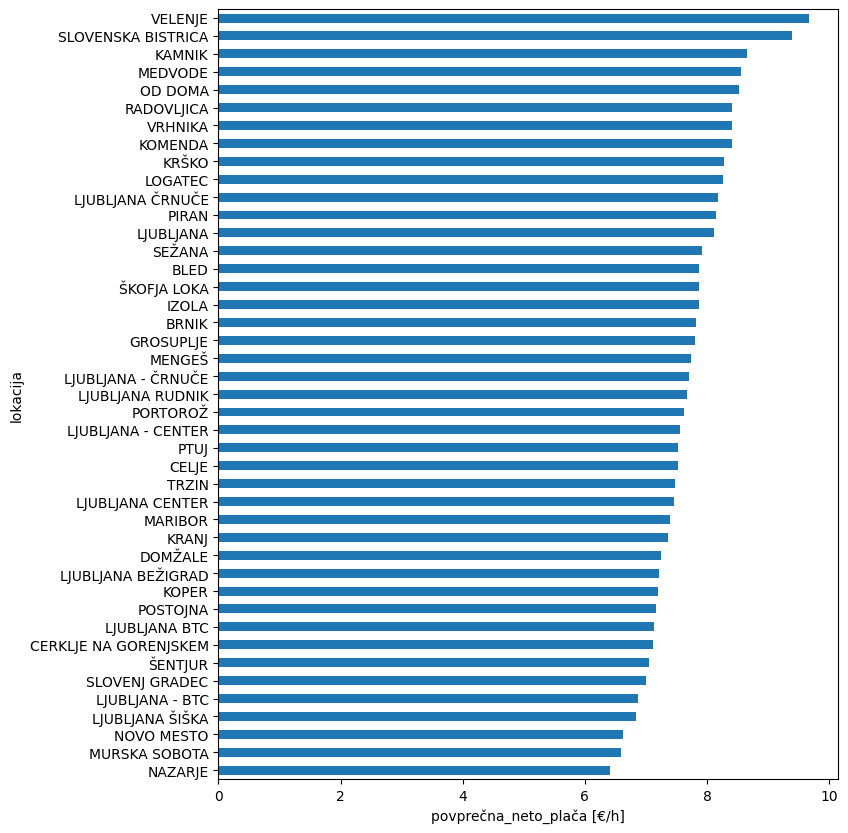

In [174]:
plača_po_lokacijah = dela_pogoste_lokacije.groupby("lokacija")["plača_neto[€/h]"].mean().sort_values().plot(kind = "barh", figsize=(8, 10))
plača_po_lokacijah.set_xlabel("povprečna_neto_plača [€/h]")
plt.show()


Poglejmo če je ta ugotovitev primerljiva z najbolj plačanim delom na določeni lokaciji.

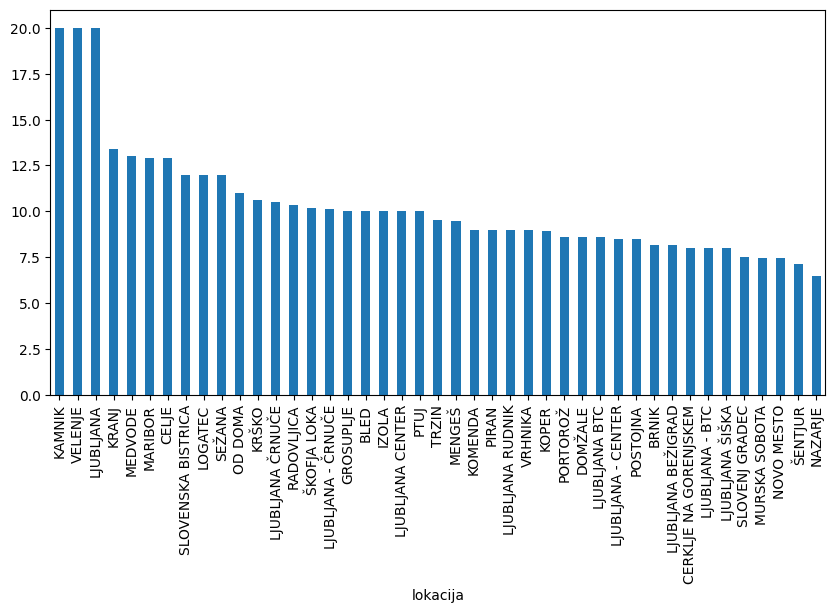

In [175]:
največja_plača = dela_pogoste_lokacije.groupby("lokacija")["plača_neto[€/h]"].max().sort_values(ascending = False)
največja_plača.plot(kind = "bar", figsize=(10, 5))
plt.show()

Vidimo, da ni nujno, da imajo kraji z najbolje plačanim delom tudi najboljše povprečje plač.

Zdaj poglejmo kateri je trenutno najbolj pogost čas za začetek dela.

In [176]:
dela['začetek_dela'] = pd.to_datetime(dela['začetek_dela'], format='%d. %m. %Y', errors='coerce')

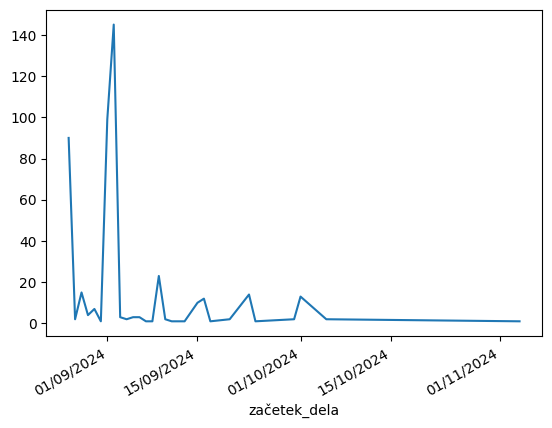

In [177]:
dela_urejena_po_začetku = dela.sort_values(by = "začetek_dela").groupby("začetek_dela").size().sort_index().plot()
dela_urejena_po_začetku.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.show()


Največ podjetji torej išče študenta, ki bi začelo kmalu vendar ne takoj.

Oglejmo si katere so najbolj iskana področja dela in katero področje potrebujejo na katerih lokacijah.

In [178]:
naj_pogoste_lokacije = štetje_lokacij[štetje_lokacij > 3].sort_values(ascending = False).index
štetje_del = dela.groupby("delo").size()
naj_pogosta_dela = štetje_del[štetje_del > 3].sort_values(ascending = False).index

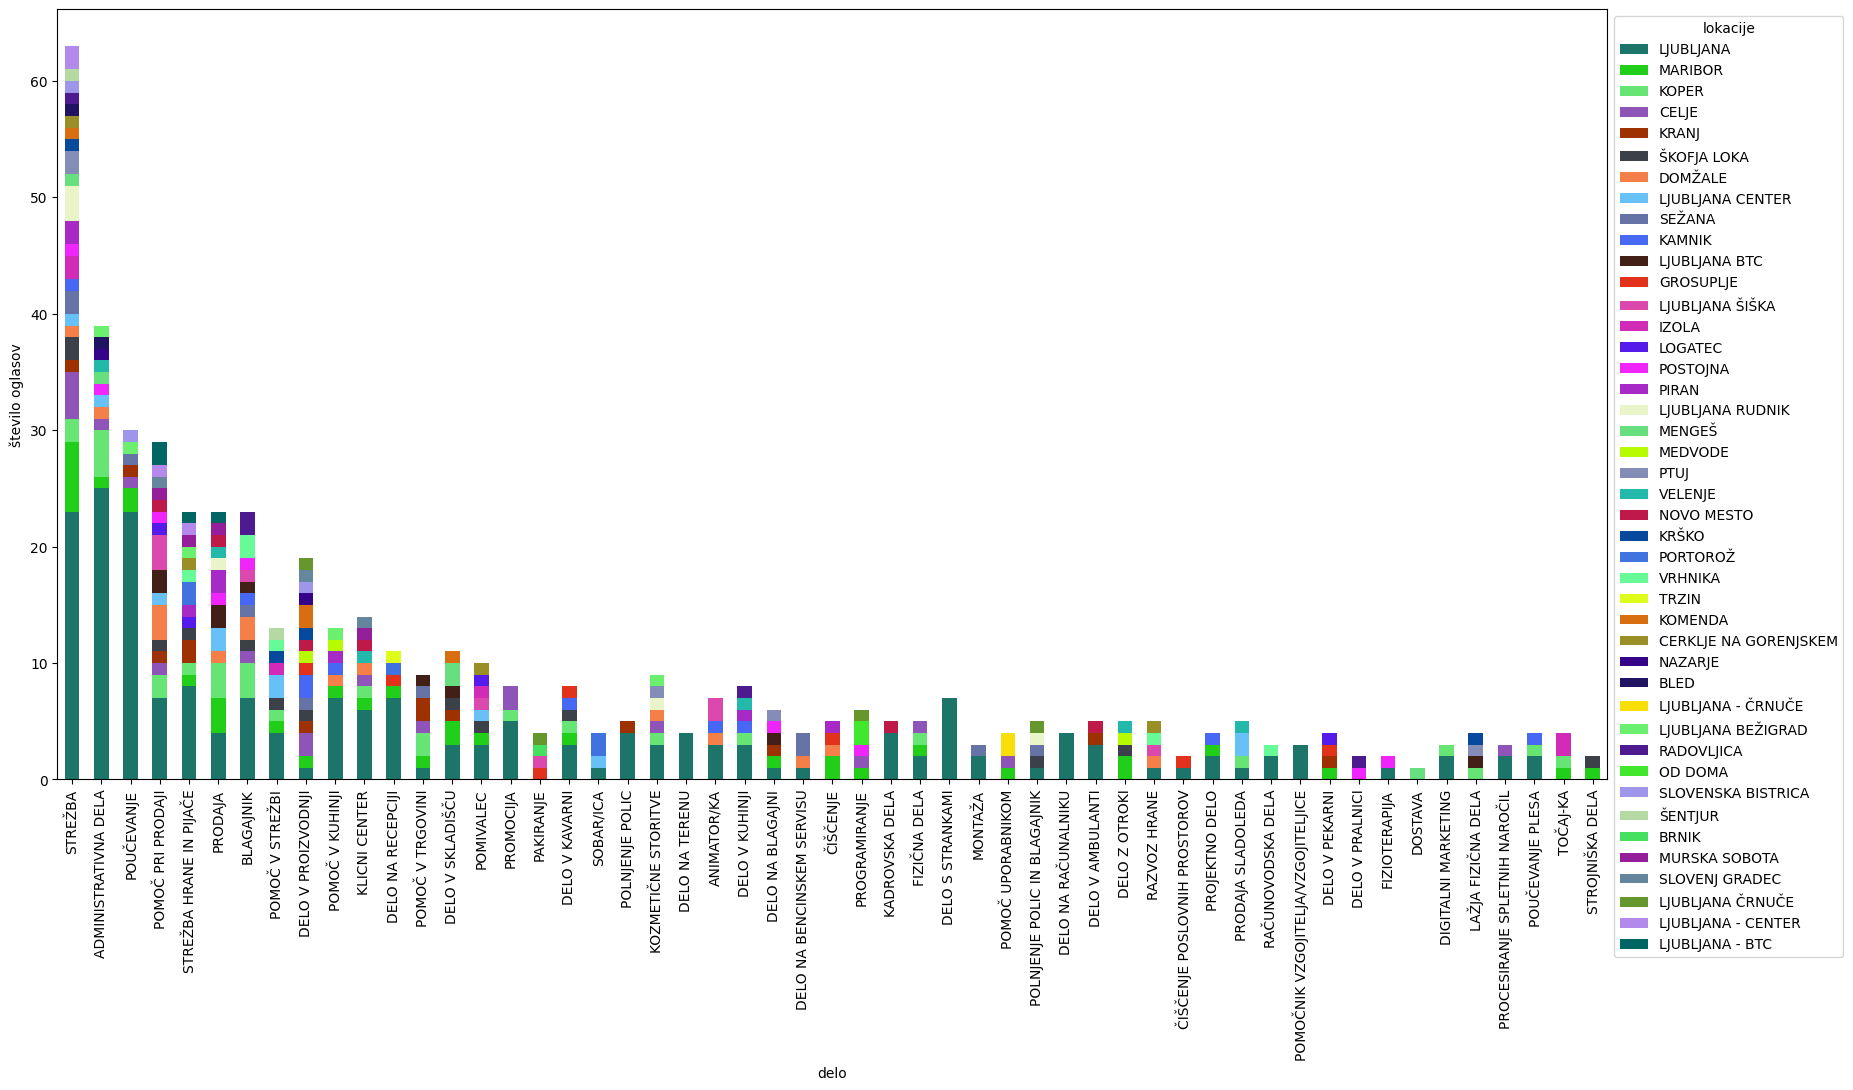

In [179]:
#ustvarjanje nove tabele
slovar_lokacij = {}
for lokacija in naj_pogoste_lokacije:
    slovar_lokacij[lokacija] = []
    for delo in naj_pogosta_dela:
        št = dela[(dela["delo"] == delo) & (dela["lokacija"] == lokacija)].shape[0]
        slovar_lokacij[lokacija].append(št)
tabela_lokacij_in_del = pd.DataFrame(slovar_lokacij, index = naj_pogosta_dela)
#ustvarjanje grafa
#uvoz novih barv, ker se ponavljajo
barve= ["#"+"".join([random.choice("0123456789ABCDEF") for j in range(6)])
              for i in range(len(tabela_lokacij_in_del.columns))]
tabela_lokacij_in_del.plot(kind="bar", stacked=True, figsize=(20, 10), color=barve)
plt.legend(title = "lokacije", bbox_to_anchor=(1.0, 1.0)) #premik legende
plt.ylabel("število oglasov")
plt.show()

Največ študentov torej iščejo za delo v strežbi, prav tako ponovno vidimo prevladovanje del v Ljubljani.

Preverimo katera vrsta dela je najbolje plačana.

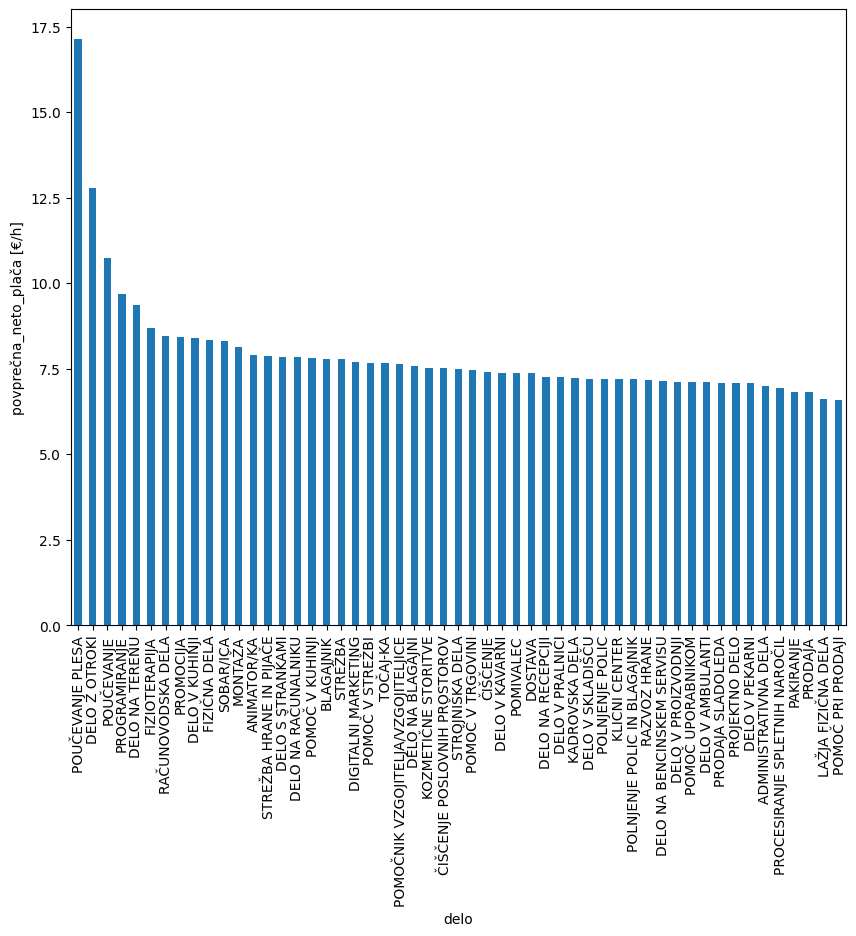

In [180]:
dela_pogosta_dela = dela[dela["delo"].isin(naj_pogosta_dela)]
dela_pogosta_dela.groupby("delo")["plača_neto[€/h]"].mean().sort_values(ascending = False).plot(kind = "bar", figsize=(10, 8))
plt.ylabel("povprečna_neto_plača [€/h]")
plt.show()

Najbolje so torej plačana dela povezana z otroki.

Oglejmo si kako je s prostimi mesti in plačo.

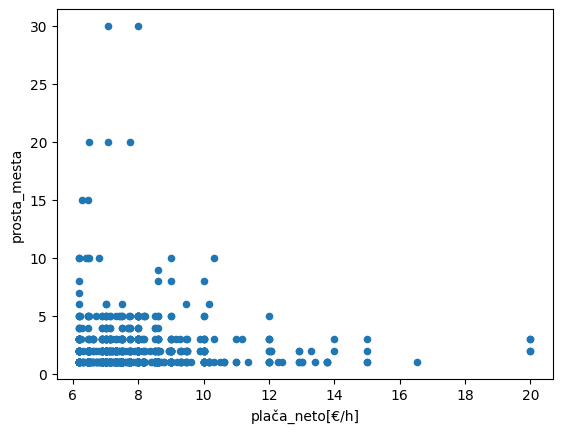

In [181]:
dela.plot.scatter(x = "plača_neto[€/h]", y = "prosta_mesta")
plt.show()

Vidimo, da je najbolj pogosta nizka plača in majhno število prostih mest.

## Zaključek

Ugotovili smo, da študentska dela v povprečju niso dobro plačana, bolje so plačana, če imaš izkušnje. Najbolje je plačano poučevanje, zanj je tudi veliko objavlenih oglasov. Iz analize je prav tako razvidno, da so oglasi za delo, glede na lokacijo, močno skoncentrirani na Ljubljano z okolico.